# 3. Random Forest

In [91]:
# Import pandas library for data manipulation
import pandas as pd

# Import numpy library for numerical operations  
import numpy as np  

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for data visualization
import seaborn as sns

# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Import the accuracy_score function from sklearn.metrics
from sklearn.metrics import accuracy_score

# Import the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

In [92]:
# Read the CSV file 'wine.csv' into a pandas DataFrame 'df'
df = pd.read_csv('wine.csv')
df

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [93]:
# Shows a tuple with row and column size
df.shape

(1143, 13)

In [94]:
# Returns the first few rows of the DataFrame df
df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [95]:
# Generate descriptive statistics of the DataFrame 'df'
df.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,804.969379,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,463.997116,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,411.000000,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,794.000000,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,1209.500000,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,1597.000000,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [96]:
# Display concise information about the DataFrame 'df'
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1143 non-null   int64  
 1   fixed acidity         1143 non-null   float64
 2   volatile acidity      1143 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1143 non-null   float64
 6   free sulfur dioxide   1143 non-null   float64
 7   total sulfur dioxide  1143 non-null   float64
 8   density               1143 non-null   float64
 9   pH                    1143 non-null   float64
 10  sulphates             1143 non-null   float64
 11  alcohol               1143 non-null   float64
 12  quality               1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Five Interesting Insights from Dataset

### 1. Correlation Between Features and Wine Quality
The quality of wine is likely influenced by multiple chemical properties. Understanding the correlation between features such as alcohol content, acidity, and sulphates can reveal important patterns.

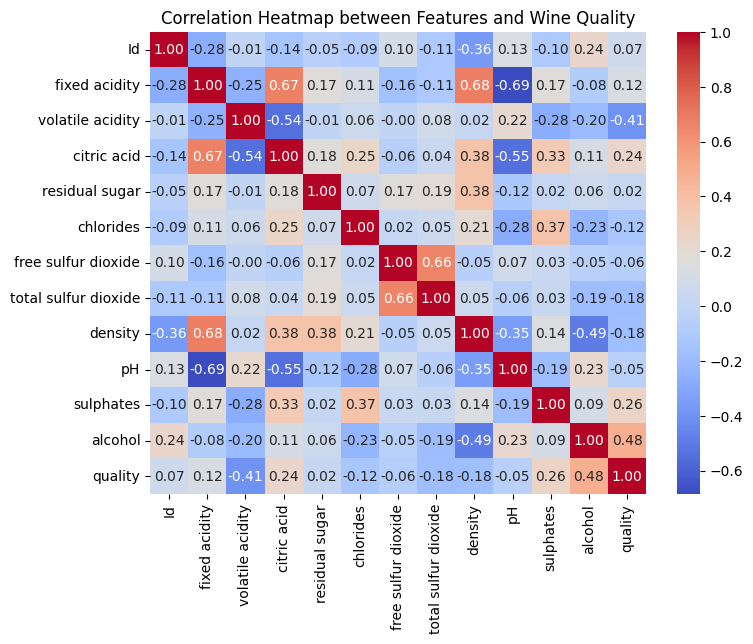

In [97]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap between Features and Wine Quality")
plt.show()


### 2. Alcohol Content Distribution by Wine Quality
Alcohol content may vary across different wine qualities. Understanding this distribution can help identify trends in higher-quality wines.

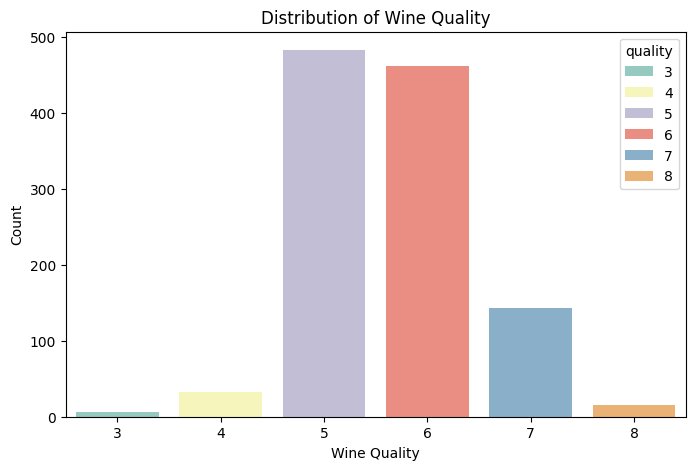

In [98]:
# Calculate probability distribution of 'quality'
quality_counts = df['quality'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=quality_counts.index, y=quality_counts.values, hue=quality_counts.index, palette='Set3', dodge=False)
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()


### 3. pH vs. Sulphates for High-Quality Wines
pH and sulphates might be crucial in determining wine quality. This insight can help in identifying the ideal pH and sulphate range for higher quality wines.

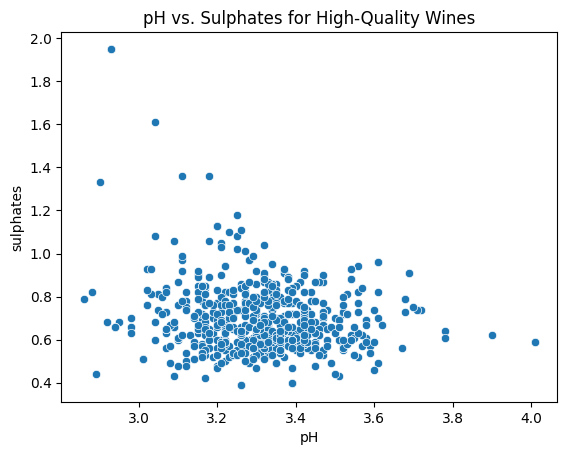

In [99]:
high_quality_wine = df[df['quality'] >= 6]
sns.scatterplot(x='pH', y='sulphates', data=high_quality_wine)
plt.title('pH vs. Sulphates for High-Quality Wines')
plt.show()


### 2. Insight: Relationship Between Sulfur Dioxide and Wine Quality
The presence of sulfur dioxide is critical in wine preservation. Investigating its relationship with wine quality could reveal if a certain level of sulfur dioxide is beneficial for higher-quality wines.


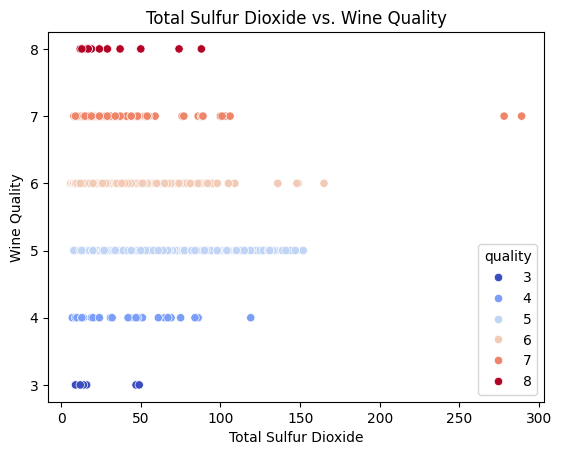

In [100]:
sns.scatterplot(x='total sulfur dioxide', y='quality', data=df, hue='quality', palette='coolwarm')
plt.title('Total Sulfur Dioxide vs. Wine Quality')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Wine Quality')
plt.show()


### 5. Alcohol Content vs. Quality
Alcohol content might have a significant impact on wine quality. Analyzing its distribution across different quality levels could help in identifying the alcohol range optimal for higher-quality wines.


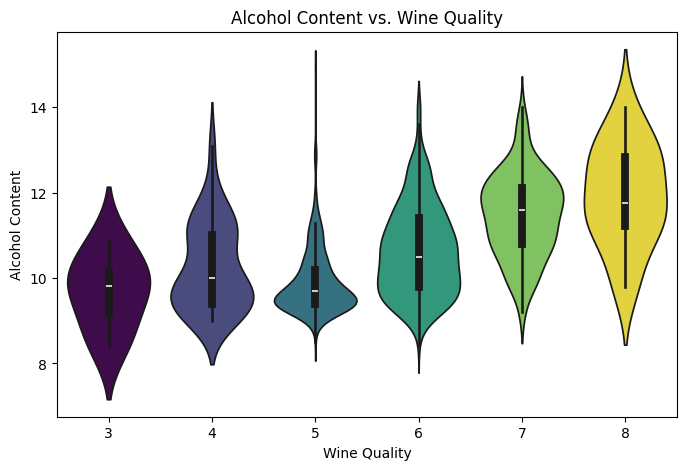

In [101]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='quality', y='alcohol', data=df, hue='quality', palette='viridis', legend=False)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()


In [102]:
# Drop the column 'Id' from the DataFrame along the columns axis (axis=1)
df = df.drop('Id', axis=1)

In [103]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [104]:
# Create a new DataFrame 'x' containing features by dropping the 'quality' column along the columns axis (axis=1)
x = df.drop('quality', axis=1)

# Create a Series 'y' containing the target variable 'quality' from the DataFrame 'df'
y = df['quality']



In [105]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [106]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [107]:
# Split the data into training and testing sets
# x_train: Features for training
# x_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=95)


In [108]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
400,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7
1008,10.0,0.320,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6
1064,7.1,0.220,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4
1084,7.4,0.470,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5
502,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
352,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
353,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
343,10.2,0.645,0.36,1.8,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
773,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8


In [109]:
# Import the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier


In [110]:
# Create a RandomForestClassifier object with a specific random state for reproducibility
dt = RandomForestClassifier(random_state=0)


In [111]:
# Train (fit) the RandomForestClassifier model on the training data
dt.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [112]:
# Use the trained RandomForestClassifier model to predict the target variable for the test data
y_pred = dt.predict(x_test)


In [113]:
# Calculate the accuracy score of the RandomForestClassifier model on the test data
score = dt.score(x_test,y_test)
score

0.673469387755102

In [114]:
# Compute the confusion matrix based on the actual and predicted values
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   7,   4,   1,   0],
       [  0,   0, 107,  30,   2,   0],
       [  0,   1,  31, 101,  12,   0],
       [  0,   0,   2,  17,  23,   0],
       [  0,   0,   0,   2,   2,   0]])

In [115]:

# Calculate the accuracy score of the predictions made by the model
score = accuracy_score(y_test,y_pred)
# Print the accuracy score
print("Accuracy Score:", score)

Accuracy Score: 0.673469387755102


In [116]:

# Calculate probability distribution of 'quality'
quality_counts = df['quality'].value_counts()
total_samples = quality_counts.sum()
quality_probabilities = quality_counts / total_samples

# Calculate Gini index
gini_index = 1 - sum([(p ** 2) for p in quality_probabilities])
print("Gini index :", gini_index)



Gini index : 0.6413461221984171


In [117]:
# Generate a classification report based on the actual and predicted values
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.72      0.77      0.75       139
           6       0.66      0.70      0.68       145
           7       0.57      0.55      0.56        42
           8       0.00      0.00      0.00         4

    accuracy                           0.67       343
   macro avg       0.33      0.34      0.33       343
weighted avg       0.64      0.67      0.66       343



c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo